# 📚 Support Vector Machines (SVM) 

---

## 1. 🎯 Intuition Behind SVM

- **Support Vector Machine (SVM)** is a **powerful supervised learning algorithm** used for:
  - **Classification** (mainly),
  - and sometimes **regression** (SVR: Support Vector Regression).

- The **main idea**:
  - Find the **best hyperplane** (a line in 2D, a plane in 3D, etc.) that **separates classes** **with the maximum margin**.
  - **Margin**: the distance between the hyperplane and the nearest data points (called **support vectors**).

- **Goal**:
  - Maximize the margin → more robust to noise and better generalization.

---

## 2. 🧠 How SVM Works

1. Find a **hyperplane** that separates the two classes as widely as possible.
2. Only **support vectors** (the closest points) matter for defining the hyperplane.
3. If data is **not linearly separable**:
   - Use the **kernel trick** (e.g., polynomial, RBF kernel) to project data into a **higher-dimensional space** where it becomes separable.

---

## 3. 🧩 Key Concepts

| Term | Meaning |
|:----|:--------|
| **Hyperplane** | The decision boundary that separates classes |
| **Support Vectors** | The critical data points closest to the hyperplane |
| **Margin** | Distance between hyperplane and support vectors |
| **Kernel Trick** | Map data into higher dimensions to make it linearly separable |

---

## 4. ⚙️ Important Parameters

| Parameter | Description |
|:----------|:------------|
| `C` | Regularization parameter (trade-off between maximizing margin and minimizing misclassification) |
| `kernel` | Function to transform input space (linear, polynomial, RBF, sigmoid) |
| `gamma` | Defines how far the influence of a single training example reaches (only for 'rbf', 'poly', 'sigmoid') |

---

## 5. 🐍 Python Code Example (SVM Classification)

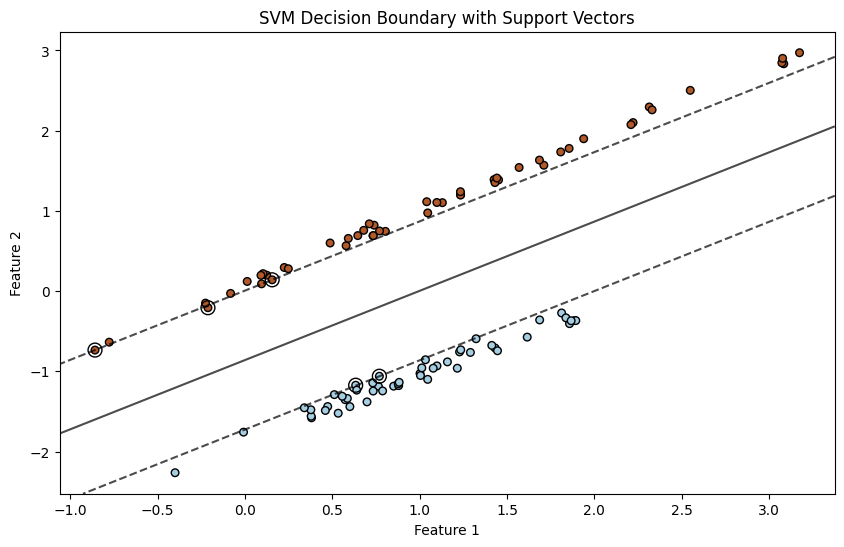

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# 1. Create a simple dataset
X, y = datasets.make_classification(
    n_samples=100, n_features=2, n_informative=2, n_redundant=0,
    n_clusters_per_class=1, random_state=42
)

# 2. Train an SVM model
svm_clf = SVC(kernel='linear', C=1.0)  # Linear kernel
svm_clf.fit(X, y)

# 3. Plotting the decision boundary
def plot_svm_decision_boundary(model, X, y):
    plt.figure(figsize=(10, 6))
    
    # Scatter plot of points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired, edgecolors='k')
    
    # Create grid to evaluate model
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    
    # Plot decision boundary and margins
    plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.7,
                linestyles=['--', '-', '--'])
    
    # Plot support vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=100, linewidth=1, facecolors='none', edgecolors='k')
    
    plt.title("SVM Decision Boundary with Support Vectors")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Call the function
plot_svm_decision_boundary(svm_clf, X, y)

## 6. 📈 Code Explanation

- **`make_classification`**:
  - Creates a 2D simple dataset.
- **`SVC(kernel='linear')`**:
  - Trains a Linear SVM (no nonlinear transformation).
- **`decision_function`**:
  - Computes the distance of points to the decision boundary.
- **`support_vectors_`**:
  - Points lying closest to the hyperplane — they define the margin.

---

## 7. ✨ Observations

- Only the **support vectors** determine the SVM hyperplane.
- **Larger margin** → better generalization.
- **Adjusting `C`**:
  - **Low `C`**: Wider margin (allow more errors).
  - **High `C`**: Narrower margin (less tolerance for errors, possibly overfitting).
- Using **kernels** like `'rbf'`, `'poly'` can help with **nonlinear classification**.

---

## 8. 🏆 Conclusion

- **Support Vector Machine** is an **elegant and powerful** classification method.
- It tries to **maximize the margin** for better generalization.
- Only **critical points (support vectors)** influence the model.
- **Kernel Trick** allows SVMs to handle **nonlinear problems** efficiently.
- With proper tuning (`C`, `gamma`, `kernel`), SVMs can achieve **state-of-the-art** performance on many tasks.

---

## 🔥 Bonus Tip

- Try experimenting with:
  - `kernel='rbf'`
  - `C=0.1`, `C=10`
- Visualize how the decision boundary changes!
- Always **scale features** when using SVMs (important especially for **nonlinear kernels**).

